# POLYNOMIAL LINEAR REGRESSION

y = $b_0 + b_1x_1 + b_2x_1^2 + ... + b_nx_1^n $  
* Use when relationship between dependent and independent variable is not linear.

**LINEAR**  
* Linear and Non-Linear is referring to coefficients - not independent variables.

**Data Preprocessing**

In [9]:
# Data Preprocessing Template
# Importing the dataset
data.salaries = read.csv('Position_Salaries.csv')

**PLOT BELOW SHOWS THE RELATIONSHIP IS NOT LINEAR**

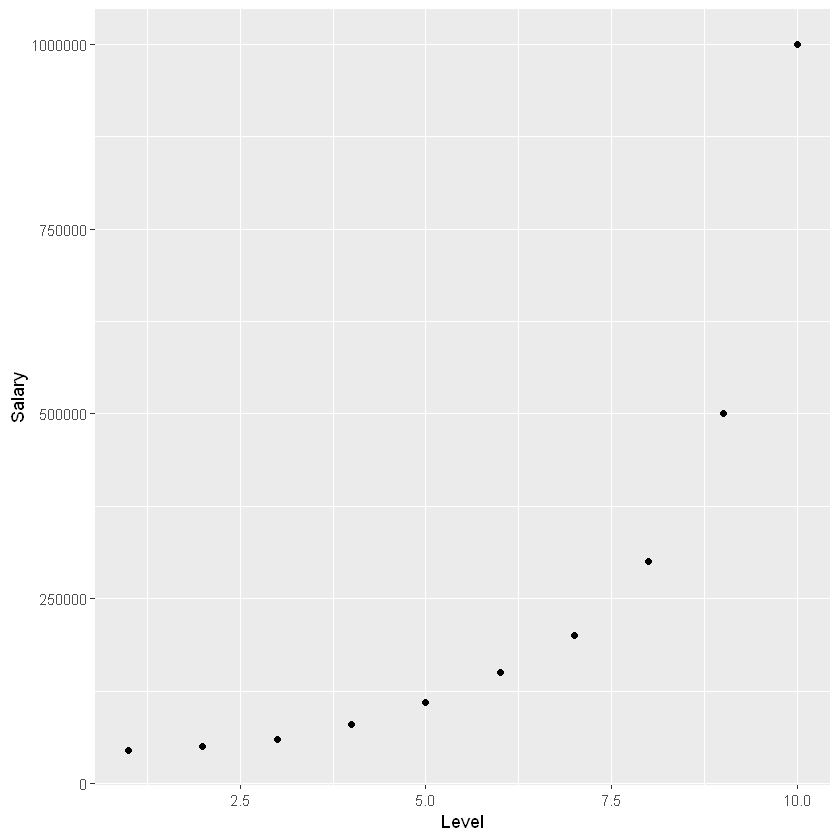

In [10]:
library(ggplot2)
ggplot(data.salaries, aes(x = Level, y = Salary)) + geom_point()

In [11]:
data.salaries <- data.salaries[,2:3]
# No splitting into Test/Train - small instructional dataset.

**COMPARE LINEAR MODEL TO POLYNOMIAL MODEL**

In [13]:
lin.reg <- lm(formula = Salary ~ .,
             data = data.salaries)

summary(lin.reg)


Call:
lm(formula = Salary ~ ., data = data.salaries)

Residuals:
    Min      1Q  Median      3Q     Max 
-170818 -129720  -40379   65856  386545 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -195333     124790  -1.565  0.15615   
Level          80879      20112   4.021  0.00383 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 182700 on 8 degrees of freedom
Multiple R-squared:  0.669,	Adjusted R-squared:  0.6277 
F-statistic: 16.17 on 1 and 8 DF,  p-value: 0.003833


In [15]:
data.salaries$L2 <- data.salaries$Level^2
data.salaries$L3 <- data.salaries$Level^3
poly.reg <- lm(formula = Salary ~ .,
              data = data.salaries)

summary(poly.reg)


Call:
lm(formula = Salary ~ ., data = data.salaries)

Residuals:
   Min     1Q Median     3Q    Max 
-75695 -28148   7091  29256  49538 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -121333.3    97544.8  -1.244  0.25994   
Level        180664.3    73114.5   2.471  0.04839 * 
L2           -48549.0    15081.0  -3.219  0.01816 * 
L3             4120.0      904.3   4.556  0.00387 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 50260 on 6 degrees of freedom
Multiple R-squared:  0.9812,	Adjusted R-squared:  0.9718 
F-statistic: 104.4 on 3 and 6 DF,  p-value: 1.441e-05


**Visualize Linear Regression Results**  
* Notice the straight line predictions - a feature of a linear model without polynomials.

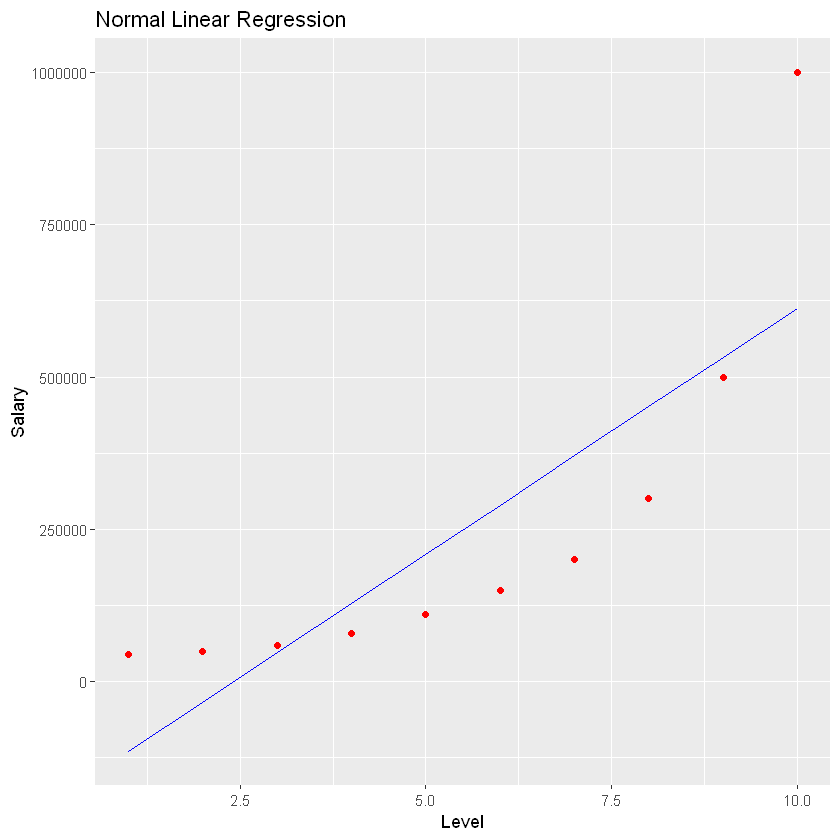

In [20]:
library(ggplot2)
ggplot(data.salaries) + geom_point(aes(x = Level, y = Salary), color = 'red') + 
                        geom_line(aes(x = Level, y = predict(lin.reg, data.salaries)), color = 'blue') + 
                        ggtitle('Normal Linear Regression') +xlab('Level') +ylab('Salary')

**Visualize Polynomial Regression Results**  
Simply copy the linear regression code - and change the regressor used in the predict function.

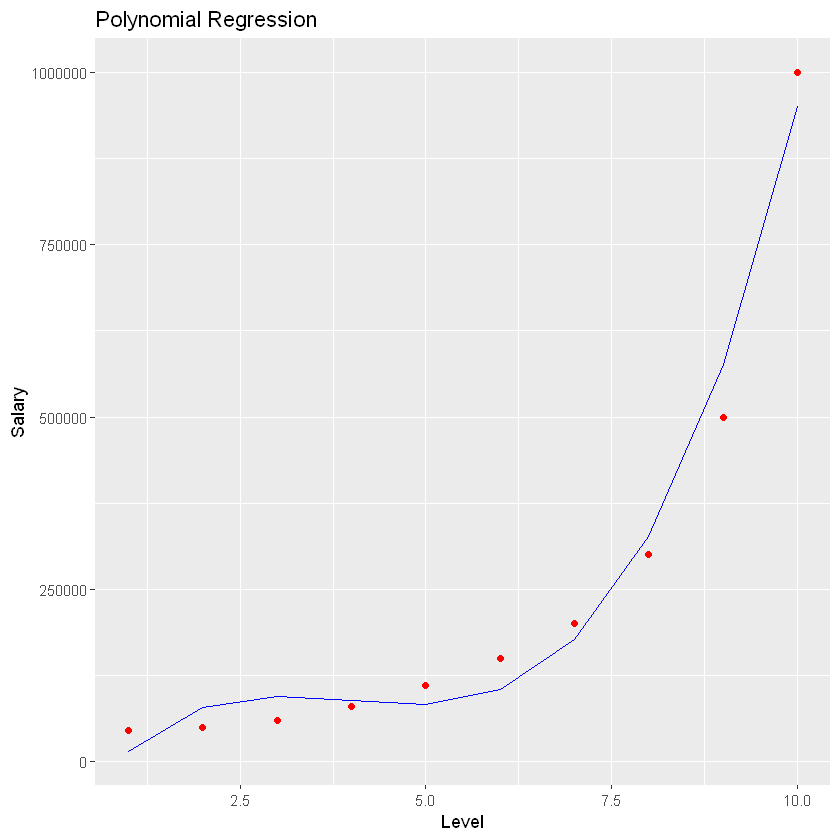

In [22]:
library(ggplot2)
ggplot(data.salaries) + geom_point(aes(x = Level, y = Salary), color = 'red') + 
                        geom_line(aes(x = Level, y = predict(poly.reg, data.salaries)), color = 'blue') + 
                        ggtitle('Polynomial Regression') +xlab('Level') +ylab('Salary')

**Predict a New Result with Linear and Polynomial Regression**

In [29]:
round(predict(lin.reg, data.frame(Level = 6.5)),2)
round(predict(poly.reg, data.frame(Level = 6.5, L2 = 6.5^2, L3 = 6.5^3)),2)


1 
330378.8

1 
133259.5